In [95]:
import requests
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from cycler import cycler
import seaborn as sns


In [121]:
# Define the URL and query parameters
url = "https://publicationtool.jao.eu/core/api/data/validationReductions"
params = {
    "FromUtc": "2025-01-10T23:00:00.000Z",
    "ToUtc": "2025-01-11T23:00:00.000Z"
}

try:
    # Make the GET request
    response = requests.get(url, params=params, verify=False)
    
    # Check if the request was successful
    response.raise_for_status()  # Raises an HTTPError for bad responses (4xx and 5xx)
    
    # Parse and print the JSON response
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

# Extract the 'data' list
data_list = data['data']

# Create a DataFrame
df = pd.DataFrame(data_list)
columns_to_drop = df.columns[8:16]  # Select columns 10 through 20
df = df.drop(columns=columns_to_drop)
df = df.iloc[:, 1:-3]
df = df[df['tso'] == 'ELES']
df.head(1)

c:\Users\Jaka\anaconda3\lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicationtool.jao.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,dateTimeUtc,tso,cnecName,direction,iva,ivaShare,justification,coreNp_AT,coreNp_BE,coreNp_CZ,coreNp_DE,coreNp_FR,coreNp_HR,coreNp_HU,coreNp_NL,coreNp_PL,coreNp_RO,coreNp_SK,coreNp_SI
0,2025-01-11T05:00:00Z,ELES,400 kV Maribor - Kainachtal 1 / Kainachtal - ...,OPPOSITE,13.0,None,IVA applied due to unsolvable overloads,3251.0,-2863.0,1464.0,1820.0,4188.0,-145.0,-2210.0,-1348.0,1537.0,-3518.0,-456.0,-1719.0


In [122]:
df['dateTimeUtc'] = pd.to_datetime(df['dateTimeUtc'], utc=True)
# Convert to Ljubljana time zone (Europe/Ljubljana)
ljubljana_tz = pytz.timezone('Europe/Ljubljana')
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_convert(ljubljana_tz)
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_localize(None)

In [123]:
df[['Kritični element', 'Izpad']] = df['cnecName'].str.split('/', expand=True)
cols = list(df.columns)  # Get current column order
cols.remove('Kritični element')  # Remove the column from the list
cols.remove('Izpad')  # Remove the column from the list

# Insert the columns at the desired position (2nd and 3rd place)
cols = cols[:2] + ['Kritični element', 'Izpad'] + cols[2:]

df = df[cols]  # Reorder DataFrame
df = df.drop(['cnecName', 'ivaShare'], axis=1)
df['Izpad'] = df['Izpad'].apply(lambda x: ' '.join(x.split()[4:]))
df.head(2)

,dateTimeUtc,tso,Kritični element,Izpad,direction,iva,justification,coreNp_AT,coreNp_BE,coreNp_CZ,coreNp_DE,coreNp_FR,coreNp_HR,coreNp_HU,coreNp_NL,coreNp_PL,coreNp_RO,coreNp_SK,coreNp_SI
0,2025-01-11 06:00:00,ELES,400 kV Maribor - Kainachtal 1,400 kV Maribor - Kainachtal 2,OPPOSITE,13.0,IVA applied due to unsolvable overloads,3251.0,-2863.0,1464.0,1820.0,4188.0,-145.0,-2210.0,-1348.0,1537.0,-3518.0,-456.0,-1719.0
1,2025-01-11 06:00:00,ELES,400 kV Maribor - Kainachtal 2,400 kV Maribor - Kainachtal 1,OPPOSITE,13.0,IVA applied due to unsolvable overloads,3251.0,-2863.0,1464.0,1820.0,4188.0,-145.0,-2210.0,-1348.0,1537.0,-3518.0,-456.0,-1719.0


In [124]:
# # Create a new DataFrame with only the filtered columns
df_slo = df.copy()
# Dictionary to map country codes to country names
country_mapping = {
    'AT': 'Avstrija',
    'BE': 'Belgija',
    'CZ': 'Češka',
    'DE': 'Nemčija',
    'FR': 'Francija',
    'HR': 'Hrvaška',
    'HU': 'Madžarska',
    'NL': 'Nizozemska',
    'PL': 'Poljska',
    'RO': 'Romunija',
    'SI': 'Slovenija',
    'SK': 'Slovaška',
    'IT': 'Italija'
}

# Function to map country code to full name
def map_country_name(col_name):
    # Extract the country code (last two characters)
    country_code = col_name.split('_')[1]
    # Map the country code to the full country name
    country_name = country_mapping.get(country_code, country_code)  # Default to country code if not found
    return f"{country_name}"

# Change column names by applying the mapping
df_slo.columns = [map_country_name(col) if 'coreNp_' in col else col for col in df_slo.columns]
# df_slo = df_slo.round(0).astype(int)
df_slo

,dateTimeUtc,tso,Kritični element,Izpad,direction,iva,justification,Avstrija,Belgija,Češka,Nemčija,Francija,Hrvaška,Madžarska,Nizozemska,Poljska,Romunija,Slovaška,Slovenija
0,2025-01-11 06:00:00,ELES,400 kV Maribor - Kainachtal 1,400 kV Maribor - Kainachtal 2,OPPOSITE,13.0,IVA applied due to unsolvable overloads,3251.0,-2863.0,1464.0,1820.0,4188.0,-145.0,-2210.0,-1348.0,1537.0,-3518.0,-456.0,-1719.0
1,2025-01-11 06:00:00,ELES,400 kV Maribor - Kainachtal 2,400 kV Maribor - Kainachtal 1,OPPOSITE,13.0,IVA applied due to unsolvable overloads,3251.0,-2863.0,1464.0,1820.0,4188.0,-145.0,-2210.0,-1348.0,1537.0,-3518.0,-456.0,-1719.0
8,2025-01-11 11:00:00,ELES,400 kV Maribor - Kainachtal 1,400 kV Maribor - Kainachtal 2,OPPOSITE,19.0,IVA applied due to unsolvable overloads,1423.0,-821.0,3616.0,4122.0,-11546.0,-1963.0,-987.0,2645.0,4301.0,-2040.0,2481.0,-1229.0
9,2025-01-11 11:00:00,ELES,400 kV Maribor - Kainachtal 2,400 kV Maribor - Kainachtal 1,OPPOSITE,19.0,IVA applied due to unsolvable overloads,1423.0,-821.0,3616.0,4122.0,-11546.0,-1963.0,-987.0,2645.0,4301.0,-2040.0,2481.0,-1229.0
11,2025-01-11 12:00:00,ELES,400 kV Maribor - Kainachtal 1,400 kV Maribor - Kainachtal 2,OPPOSITE,19.0,IVA applied due to unsolvable overloads,1366.0,-1071.0,3626.0,4065.0,-11082.0,-963.0,-19.0,2540.0,4599.0,-2866.0,1929.0,-2123.0
12,2025-01-11 12:00:00,ELES,400 kV Maribor - Kainachtal 2,400 kV Maribor - Kainachtal 1,OPPOSITE,19.0,IVA applied due to unsolvable overloads,1366.0,-1071.0,3626.0,4065.0,-11082.0,-963.0,-19.0,2540.0,4599.0,-2866.0,1929.0,-2123.0


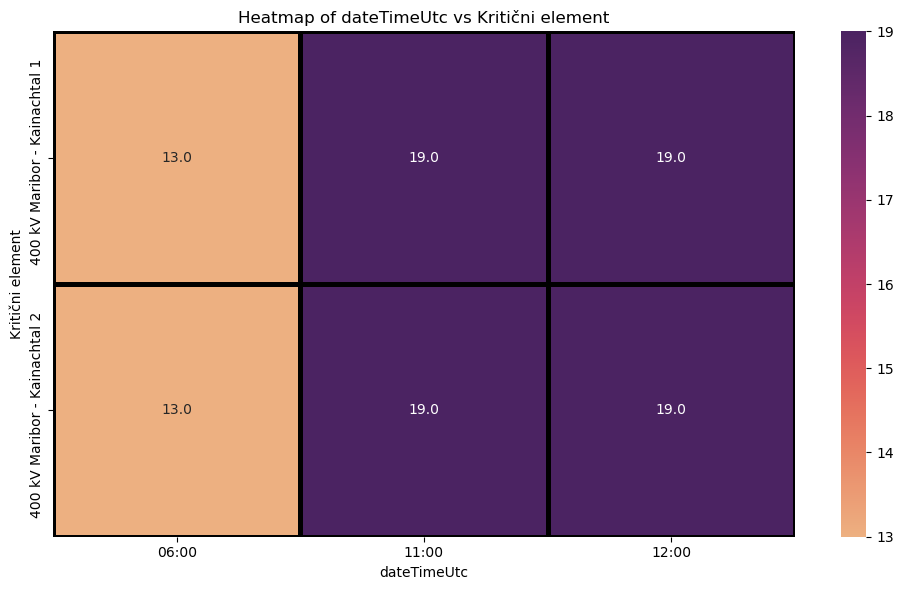

In [125]:
df['Hour_Minute'] = df['dateTimeUtc'].dt.strftime('%H:%M')

heatmap_data = df.pivot_table(
    index='Kritični element',
    columns='Hour_Minute',
    values='iva',  # The data to be visualized (can be counts or another metric)
    aggfunc='sum'  # Use 'sum', 'mean', etc., depending on your needs
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="flare", annot=True, fmt=".1f",  linewidths=2.5, linecolor='black')
plt.title("Heatmap of dateTimeUtc vs Kritični element")
plt.xlabel("dateTimeUtc")
plt.ylabel("Kritični element")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [117]:
df_resampled

,dateTimeUtc,iva,coreNp_AT,coreNp_BE,coreNp_CZ,coreNp_DE,coreNp_FR,coreNp_HR,coreNp_HU,coreNp_NL,coreNp_PL,coreNp_RO,coreNp_SK,coreNp_SI,Hour_Minute
0,2025-01-11 06:00:00,26.0,6502.0,-5726.0,2928.0,3640.0,8376.0,-290.0,-4420.0,-2696.0,3074.0,-7036.0,-912.0,-3438.0,06:00
1,2025-01-11 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,07:00
2,2025-01-11 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,08:00
3,2025-01-11 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09:00
4,2025-01-11 10:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10:00
5,2025-01-11 11:00:00,38.0,2846.0,-1642.0,7232.0,8244.0,-23092.0,-3926.0,-1974.0,5290.0,8602.0,-4080.0,4962.0,-2458.0,11:00
6,2025-01-11 12:00:00,38.0,2732.0,-2142.0,7252.0,8130.0,-22164.0,-1926.0,-38.0,5080.0,9198.0,-5732.0,3858.0,-4246.0,12:00
